# BaseLine

In [ ]:
import pandas as pd
from sklearn import datasets
import pandas as pd


features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']


iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df.columns=features
iris_df['target'] = iris.target


In [ ]:
x = iris.data
y = iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

In [ ]:
test_size=0.8
train_x, test_x, train_y, test_y  = train_test_split(x[:, :], y, test_size=test_size, random_state=1)

In [ ]:
model_name = 'RandomForestClassifier'
model = RandomForestClassifier(random_state=1)
model.fit(train_x, train_y)

pred_test_y =model.predict(test_x)

In [ ]:
recal = recall_score(test_y, pred_test_y,average='weighted')

prec = precision_score(test_y, pred_test_y,average='weighted')
recal, prec

(0.9416666666666667, 0.9435416666666666)

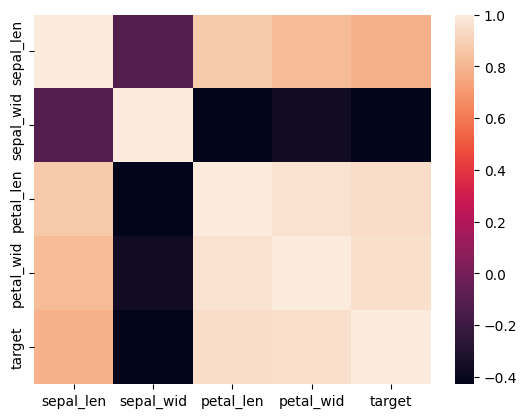

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(iris_df.corr())
plt.savefig('data/corr.png')

# Mlflow (http://84.201.128.89:90/)

In [ ]:
import mlflow

mlflow.set_tracking_uri('http://84.201.128.89:90/')

mlflow.set_experiment('admastryukov-seminar')

with mlflow.start_run(run_name='tree'):
    mlflow.log_metrics(
        {
            'prec': prec,
            'recal': recal,
        }
    )
    mlflow.log_params(
        {
        'model_name': model_name,
        'num_features': len(train_x[0]),
            'test_size': test_size,
        }
    )

    mlflow.log_artifact('data/corr.png')


# Задание на семинар

Это учебное простое задание на логирование запусков и аналитику экспериментов. Основная цель - выбрать наиболее подходящую модель для задачи.

Для этого предлагается:
1) перебрать модели из sklearn
2) потюнить параметры
3) Залогировать все артифакты в mlflow (не большее 100 МБ)
4) Выбрать лучшую модель в своем эксперименте
5) Название эксперимента в таком формате: seminar-<name>. Другие будут удалены
   